In [1]:
import json
import pandas as pd
import os
import numpy as np
from collections import Counter

# Yelp

In [2]:
#open yelp data
yelp=pd.read_json('/Users/hehuiyin/Desktop/BANA 212 data $ prgm analytics/Project/yelp_dataset/yelp_academic_dataset_business.json',lines=True)
#yelp.head()

In [3]:
#check what's inside 'categories' column
#list(yelp['categories'].unique())

In [4]:
#extract only the restaurants
yelp2=yelp[yelp['categories'].str.contains("Restaurant|bars",na=False)]

In [5]:
#get only the business in US
yelp3=yelp2[yelp2['state'].str.contains('AL|AK|AZ|AR|CA|CO|CT|DE|DC|FL|GA|HI|ID|IL|IN|IA|KS|KY|LA|ME|MD|MA|MI|MN|MS|MO|MT|NE|NV|NH|NJ|NM|NY|NC|ND|NV|OH|OK|OR|PA|RI|SC|SD|TN|TX|UT|VT|VA|WA|WV|WI|WY',na=False)]



In [6]:
#check
#things inside the attributes
#yelp['attributes'].apply(pd.Series).info()

In [7]:
#convert the 'attributes' to pandas series
yelp4 = yelp3['attributes'].apply(pd.Series)
#concat the columns and drop 'attributes'
yelp5 = pd.concat([yelp3, yelp4], axis = 1).drop('attributes', axis = 1)

In [8]:
#drop irrelevant and uncommon attributes
yelp6=yelp5.drop(['HairSpecializesIn','Caters','AcceptsInsurance','AgesAllowed','DriveThru',
           'HasTV','BikeParking','BestNights','BusinessAcceptsBitcoin','ByAppointmentOnly',
                  'DogsAllowed','WheelchairAccessible','BYOB','Corkage','GoodForDancing',
                  'CoatCheck','Music','Smoking','DietaryRestrictions','BYOBCorkage',
                  'RestaurantsCounterService','Open24Hours'],axis=1)

In [9]:
#get dummy for 'RestaurantsAttire'
    #create dummy var
dummies1=pd.get_dummies(yelp6['RestaurantsAttire'])
dummies1['casual']=dummies1["'casual'"]+dummies1["u'casual'"]
dummies1['dressy']=dummies1["'dressy'"]+dummies1["u'dressy'"]
dummies1['formal']=dummies1["'formal'"]+dummies1["u'formal'"]
dummies1=dummies1[['casual','dressy','formal']]
    #concat
yelp7 = pd.concat([yelp6, dummies1],axis=1).drop('RestaurantsAttire', axis = 1)

In [10]:
#get dummy for 'RestaurantsTakeOut'
    #create dummy var
dummies2=pd.get_dummies(yelp7['RestaurantsTakeOut'],prefix='TakeOut')
dummies2=dummies2[['TakeOut_False','TakeOut_True']]
    #concat
yelp8 = pd.concat([yelp7, dummies2],axis=1).drop('RestaurantsTakeOut', axis = 1)

In [11]:
#get dummy for 'BusinessAcceptsCreditCards'
    #create dummy var
dummies3=pd.get_dummies(yelp8['BusinessAcceptsCreditCards'],prefix='CreditCard')
dummies3=dummies3[['CreditCard_False','CreditCard_True']]
    #concat
yelp9 = pd.concat([yelp8, dummies3],axis=1).drop('BusinessAcceptsCreditCards', axis = 1)

In [12]:
#get dummy for 'NoiseLevel'
    #create dummy var
dummies4=pd.get_dummies(yelp9['NoiseLevel'])
dummies4['noise_average']=dummies4["'average'"]+dummies4["u'average'"]
dummies4['loud']=dummies4["'loud'"]+dummies4["u'loud'"]
dummies4['quiet']=dummies4["'quiet'"]+dummies4["u'quiet'"]
dummies4['very_loud']=dummies4["'very_loud'"]+dummies4["u'very_loud'"]
dummies4=dummies4[['noise_average','loud','quiet','very_loud']]
    #concat
yelp10 = pd.concat([yelp9, dummies4],axis=1).drop('NoiseLevel', axis = 1)

In [13]:
#get dummy for 'GoodForKids'
    #create dummy var
dummies5=pd.get_dummies(yelp10['GoodForKids'],prefix='GoodForKids')
dummies5=dummies5[['GoodForKids_False','GoodForKids_True']]
    #concat
yelp11 = pd.concat([yelp10, dummies5],axis=1).drop('GoodForKids', axis = 1)

In [14]:
#get dummy for 'RestaurantsReservations'
    #create dummy var
dummies6=pd.get_dummies(yelp11['RestaurantsReservations'],prefix='reservations')
dummies6=dummies6[['reservations_False','reservations_True']]
    #concat
yelp12 = pd.concat([yelp11, dummies6],axis=1).drop('RestaurantsReservations', axis = 1)

In [15]:
#get dummy for 'RestaurantsGoodForGroups'
    #create dummy var
dummies7=pd.get_dummies(yelp12['RestaurantsGoodForGroups'],prefix='GoodForGroups')
dummies7=dummies7[['GoodForGroups_False','GoodForGroups_True']]
dummies7
    #concat
yelp13 = pd.concat([yelp12, dummies7],axis=1).drop('RestaurantsGoodForGroups', axis = 1)

In [16]:
#get dummy for 'Alcohol'
    #create dummy var
dummies8=pd.get_dummies(yelp13['Alcohol'])
dummies8['beer_and_wine']=dummies8["'beer_and_wine'"]+dummies8["u'beer_and_wine'"]
dummies8['full_bar']=dummies8["'full_bar'"]+dummies8["u'full_bar'"]
dummies8=dummies8[['beer_and_wine','full_bar']]
dummies8
    #concat
yelp14 = pd.concat([yelp13, dummies8],axis=1).drop('Alcohol', axis = 1)

In [17]:
#get dummy for 'RestaurantsDelivery'
    #create dummy var
dummies9=pd.get_dummies(yelp14['RestaurantsDelivery'],prefix='Delivery')
dummies9=dummies9[['Delivery_False','Delivery_True']]
dummies9
    #concat
yelp15 = pd.concat([yelp14, dummies9],axis=1).drop('RestaurantsDelivery', axis = 1)

In [18]:
#get dummy for 'OutdoorSeating'
    #create dummy var
dummies10=pd.get_dummies(yelp15['OutdoorSeating'],prefix='OutdoorSeating')
dummies10=dummies10[['OutdoorSeating_False','OutdoorSeating_True']]
dummies10
    #concat
yelp16 = pd.concat([yelp15, dummies10],axis=1).drop('OutdoorSeating', axis = 1)

In [19]:
#get dummy for 'WiFi'
    #create dummy var
dummies11=pd.get_dummies(yelp16['WiFi'],prefix='WiFi')
dummies11['WiFi_free']=dummies11["WiFi_'free'"]+dummies11["WiFi_u'free'"]
dummies11['WiFi_no']=dummies11["WiFi_'no'"]+dummies11["WiFi_u'no'"]
dummies11['WiFi_paid']=dummies11["WiFi_'paid'"]+dummies11["WiFi_u'paid'"]
dummies11=dummies11[['WiFi_free','WiFi_no','WiFi_paid']]
dummies11
    #concat
yelp17 = pd.concat([yelp16, dummies11],axis=1).drop('WiFi', axis = 1)

In [20]:
#get dummy for 'RestaurantsTableService'
    #create dummy var
dummies12=pd.get_dummies(yelp17['RestaurantsTableService'],prefix='TableService')
dummies12=dummies12[['TableService_True','TableService_False']]
dummies12
    #concat
yelp18 = pd.concat([yelp17, dummies12],axis=1).drop('RestaurantsTableService', axis = 1)

In [21]:
#get dummy for 'HappyHour'
    #create dummy var
dummies13=pd.get_dummies(yelp18['HappyHour'],prefix='HappyHour')
dummies13=dummies13[['HappyHour_True','HappyHour_False']]
dummies13
    #concat
yelp19 = pd.concat([yelp18, dummies13],axis=1).drop('HappyHour', axis = 1)

In [22]:
##Get dummies for 'BusinessParking'
#Change the float to str
#Change the str to dictionary
import re
dummies14=yelp19['BusinessParking'].apply(pd.Series).reset_index()
listdict=dummies14[[0][0]].values
listdict
arr = np.array(listdict)
listdict = arr.tolist()
listdict
listdict1=[]
for i in listdict:
    if type(i)==float:
        a=str(i)
        listdict1.append(a)
    else:
        listdict1.append(i)
listdict2=[]       
for i in listdict1:
    if i=='None' or i=='nan':
        listdict2.append(i)
    else:
        b=eval(i)
        listdict2.append(b)     

In [23]:
#get the value for each from the dictionary 
#change all the none and nan to 0 
garage=[]
street=[]
validated=[]
lot=[]
valet=[]
for i in listdict2:
    if i=='None' or i=='nan':
        a=0
        garage.append(a)
    else:
        a=i.get('garage')
        garage.append(a)
for i in listdict2:
    if i=='None' or i=='nan':
        b=0
        street.append(b)
    else:
        b=i.get('street')
        street.append(b)
for i in listdict2:
    if i=='None' or i=='nan':
        c=0
        validated.append(c)
    else:
        c=i.get('validated')
        validated.append(c)
for i in listdict2:
    if i=='None' or i=='nan':
        d=0
        lot.append(d)
    else:
        d=i.get('lot')
        lot.append(d)
for i in listdict2:
    if i=='None' or i=='nan':
        e=0
        valet.append(e)
    else:
        e=i.get('valet')
        valet.append(e)
#adding column to the df       
yelp20 = yelp19.assign(Garage=garage)
yelp20 = yelp20.assign(Street=street)
yelp20 = yelp20.assign(Validated=validated)
yelp20 = yelp20.assign(Lot=lot)
yelp20 = yelp20.assign(Valet=valet)
#change all the false to 0 and true to 1
yelp20 = yelp20.replace(True, "1").replace(False,"0")
#yelp20

In [24]:
##Get dummies for 'Ambience'
#Change the float to str
#Change the str to dictionary
import re
dummies15=yelp20['Ambience'].apply(pd.Series).reset_index()
listdict=dummies15[[0][0]].values
listdict
arr = np.array(listdict)
listdict = arr.tolist()
listdict
listdict1=[]
for i in listdict:
    if type(i)==float:
        a=str(i)
        listdict1.append(a)
    else:
        listdict1.append(i)
listdict2=[]       
for i in listdict1:
    if i=='None' or i=='nan':
        listdict2.append(i)
    else:
        b=eval(i)
        listdict2.append(b)

In [25]:
#get the value for each from the dictionary 
#change all the none and nan to 0 
romantic=[]
intimate=[]
touristy=[]
hipster=[]
divey=[]
classy=[]
trendy=[]
upscale=[]
casual=[]
for i in listdict2:
    if i=='None' or i=='nan':
        a=0
        romantic.append(a)
    else:
        a=i.get('romantic')
        romantic.append(a)
for i in listdict2:
    if i=='None' or i=='nan':
        b=0
        intimate.append(b)
    else:
        b=i.get('intimate')
        intimate.append(b)
for i in listdict2:
    if i=='None' or i=='nan':
        c=0
        touristy.append(c)
    else:
        c=i.get('touristy')
        touristy.append(c)
for i in listdict2:
    if i=='None' or i=='nan':
        d=0
        hipster.append(d)
    else:
        d=i.get('hipster')
        hipster.append(d)
for i in listdict2:
    if i=='None' or i=='nan':
        e=0
        divey.append(e)
    else:
        e=i.get('divey')
        divey.append(e)
for i in listdict2:
    if i=='None' or i=='nan':
        e=0
        classy.append(e)
    else:
        e=i.get('classy')
        classy.append(e)
for i in listdict2:
    if i=='None' or i=='nan':
        e=0
        trendy.append(e)
    else:
        e=i.get('trendy')
        trendy.append(e)
for i in listdict2:
    if i=='None' or i=='nan':
        e=0
        upscale.append(e)
    else:
        e=i.get('upscale')
        upscale.append(e)
for i in listdict2:
    if i=='None' or i=='nan':
        e=0
        casual.append(e)
    else:
        e=i.get('casual')
        casual.append(e)
#adding column to the df       
yelp21 = yelp20.assign(Romantic=romantic)
yelp21 = yelp21.assign(Intimate=intimate)
yelp21 = yelp21.assign(Touristy=touristy)
yelp21 = yelp21.assign(Hipster=hipster)
yelp21 = yelp21.assign(Divey=divey)
yelp21 = yelp21.assign(Classy=classy)
yelp21 = yelp21.assign(Trendy=trendy)
yelp21 = yelp21.assign(Upscale=upscale)
yelp21 = yelp21.assign(Casual=casual)
#change all the false to 0 and true to 1
yelp21 = yelp21.replace(True, "1").replace(False,"0")
#yelp21

In [26]:
##Get dummies for 'GoodForMeal'
#Change the float to str
#Change the str to dictionary
import re
dummies16=yelp21['GoodForMeal'].apply(pd.Series).reset_index()
listdict=dummies16[[0][0]].values
listdict
arr = np.array(listdict)
listdict = arr.tolist()
listdict
listdict1=[]
for i in listdict:
    if type(i)==float:
        a=str(i)
        listdict1.append(a)
    else:
        listdict1.append(i)
listdict2=[]       
for i in listdict1:
    if i=='None' or i=='nan':
        listdict2.append(i)
    else:
        b=eval(i)
        listdict2.append(b)     

In [27]:
#get the value for each from the dictionary 
#change all the none and nan to 0 
dessert=[]
latenight=[]
lunch=[]
dinner=[]
brunch=[]
breakfast=[]
for i in listdict2:
    if i=='None' or i=='nan':
        a=0
        dessert.append(a)
    else:
        a=i.get('dessert')
        dessert.append(a)
for i in listdict2:
    if i=='None' or i=='nan':
        b=0
        latenight.append(b)
    else:
        b=i.get('latenight')
        latenight.append(b)
for i in listdict2:
    if i=='None' or i=='nan':
        c=0
        lunch.append(c)
    else:
        c=i.get('lunch')
        lunch.append(c)
for i in listdict2:
    if i=='None' or i=='nan':
        d=0
        dinner.append(d)
    else:
        d=i.get('dinner')
        dinner.append(d)
for i in listdict2:
    if i=='None' or i=='nan':
        e=0
        brunch.append(e)
    else:
        e=i.get('brunch')
        brunch.append(e)
for i in listdict2:
    if i=='None' or i=='nan':
        e=0
        breakfast.append(e)
    else:
        e=i.get('breakfast')
        breakfast.append(e)
#adding column to the df       
yelp22 = yelp21.assign(Dessert=dessert)
yelp22 = yelp22.assign(Latenight=latenight)
yelp22 = yelp22.assign(Lunch=lunch)
yelp22 = yelp22.assign(Dinner=dinner)
yelp22 = yelp22.assign(Brunch=brunch)
yelp22 = yelp22.assign(Breakfast=breakfast)
#change all the false to 0 and true to 1
yelp22 = yelp22.replace(True, "1").replace(False,"0")
#yelp22

In [28]:
#the categories for the business
cat=pd.read_csv('/Users/hehuiyin/Desktop/BANA 212 data $ prgm analytics/Project/cat.csv')

In [29]:
#match with the categories in the data. if matches, then 1; if not, then 0.
list_cat=list(cat)
keys = []
def remove(string): 
    return string.replace(" ", "")
for e in list_cat:
    l=remove(e)
    keys.append(l)
values=[]
for n in range(len(list_cat)):
    values.append([])

for y in enumerate(list_cat):
    for j in yelp22['categories']:
        z=re.findall(y[1],j)
        values[y[0]].append(z)

In [30]:
#show all the cateogries 
print(keys, sep=' ')

['EthnicFood', 'FoodTrucks', 'MiddleEastern', 'Bakeries', 'FastFood', 'Mexican', 'Chinese', 'Vietnamese', 'Burgers', 'American', 'HotDogs', 'Coffee&Tea', 'Cafes', 'Pizza', 'Salad', 'Thai', 'Sandwiches', 'Pubs', 'Bars', 'Beer', 'Wine&Spirits', 'Nightlife', 'Seafood', 'IceCream&FrozenYogurt', 'Italian', 'Tex-Mex', 'Desserts', 'Diners', 'SushiBars', 'Barbeque', 'AsianFusion', 'Japanese', 'Vegetarian', 'Vegan', 'ChickenShop', 'FoodStands', 'JuiceBars&Smoothies', 'Mediterranean', 'CocktailBars', 'Indian', 'Tapas/SmallPlates', 'Lounges', 'WineBars', 'Gluten-Free', 'Greek', 'Korean', 'French', 'Steakhouses', 'Caribbean', 'Breweries', 'Hawaiian']


In [31]:
#put categories as columns and merge with orginal data
temp=dict(zip(keys,values))
temp
dfcat=pd.DataFrame.from_dict(temp) 
dfcat = dfcat.astype(str)
dfcat1= dfcat.replace(to_replace=r'\[.+\]', value='1', regex=True).replace(to_replace="[]", value='0')
dfcat1
yelp23=yelp22.reset_index(drop=True).merge(dfcat1.reset_index(drop=True), left_index=True, right_index=True)
yelp23

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,...,Lounges,WineBars,Gluten-Free,Greek,Korean,French,Steakhouses,Caribbean,Breweries,Hawaiian
0,pQeaRpvuhoEqudo3uymHIQ,The Empanadas House,404 E Green St,Champaign,IL,61820,40.110446,-88.233073,4.5,5,...,0,0,0,0,0,0,0,0,0,0
1,CsLQLiRoafpJPJSkNX2h5Q,Middle East Deli,4508 E Independence Blvd,Charlotte,NC,28205,35.194894,-80.767442,3,5,...,0,0,0,0,0,0,0,0,0,0
2,vjTVxnsQEZ34XjYNS-XUpA,Wetzel's Pretzels,"4550 East Cactus Rd, #KSFC-4",Phoenix,AZ,85032,33.602822,-111.983533,4,10,...,0,0,0,0,0,0,0,0,0,0
3,fnZrZlqW1Z8iWgTVDfv_MA,Carl's Jr,9595 W Tropicana Ave,Las Vegas,NV,89147,36.099738,-115.301568,2.5,15,...,0,0,0,0,0,0,0,0,0,0
4,98hyK2QEUeI8v2y0AghfZA,Pho Lee's Vietnamese Restaurant,"1541 E 38th St, Ste 101",Cleveland,OH,44114,41.512155,-81.663332,4.5,23,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38256,YZeUH6zYS0dq5QHLYZhUnQ,Hooters,2820 N 75th Ave,Phoenix,AZ,85035,33.479139,-112.221142,2,106,...,0,0,0,0,0,0,0,0,0,0
38257,xVpE01l6ZXdEtVf5PkRpDg,Julep,829 E Washington Ave,Madison,WI,53703,43.081022,-89.374006,4,95,...,0,0,0,0,0,0,0,0,0,0
38258,BAVuLTDmpSzDCk37A5HjtQ,Bruegger's Bagels,27045 Lorain Rd,North Olmsted,OH,44070,41.416568,-81.921396,3,13,...,0,0,0,0,0,0,0,0,0,0
38259,hskVqZCPqy-omm9CHi44xQ,Domino's,"6420 Rea Rd, Suite B1",Charlotte,NC,28226,35.078538,-80.818358,2,16,...,0,0,0,0,0,0,0,0,0,0


# Zillow

In [32]:
#open zillow data
zillow=pd.read_csv('/Users/hehuiyin/Desktop/BANA 212 data $ prgm analytics/Project/zillow.csv')
#zillow.head()

In [33]:
#extract only the useful columns
zillow2=zillow[['RegionName','State','City','2020-09-30']]
zillow2=zillow2.rename({'2020-09-30':'HousePrice'},axis='columns')
zillow2

,RegionName,State,City,HousePrice
0,10025,NY,New York,938408.0
1,60657,IL,Chicago,497988.0
2,10023,NY,New York,1123239.0
3,77494,TX,Katy,346555.0
4,60614,IL,Chicago,639390.0
...,...,...,...,...
30362,43523,OH,Malinta,83149.0
30363,7703,NJ,Eatontown,595863.0
30364,47865,IN,Carlisle,40874.0
30365,822,LA,Choudrant,195484.0


In [34]:
#get the percentile for each states
quantile1=zillow2.groupby('State')['HousePrice'].quantile(0.25)
quantile2=zillow2.groupby('State')['HousePrice'].quantile(0.5)
quantile3=zillow2.groupby('State')['HousePrice'].quantile(0.75)
quantile1=pd.DataFrame({'state':quantile1.index, 'quan1':quantile1.values})
quantile2=pd.DataFrame({'state':quantile2.index, 'quan2':quantile2.values})
quantile3=pd.DataFrame({'state':quantile3.index, 'quan3':quantile3.values})

In [35]:
#merge percentiles together
quantile=pd.merge(quantile1,quantile2,on='state')
quantile=pd.merge(quantile,quantile3,on='state')

In [36]:
#setup house price range (1-4) based on the percentiles
#0 – 25%: 1, 25% - 50%: 2, 50%-75%: 3, 75% & above: 4 
houserange=[]
for i,v in quantile.iterrows():
    for a,b in zillow2.iterrows():
        if v['state']==b['State']:
            if b['HousePrice']<=v['quan1']:
                houserange.append(1)
            elif (b['HousePrice'] > v['quan1']) & (b['HousePrice']<=v['quan2']):
                houserange.append(2)
            elif (b['HousePrice'] > v['quan2'] )& (b['HousePrice']<=v['quan3']):
                houserange.append(3)
            else:
                houserange.append(4)
zillow2['range']=houserange

In [37]:
#check
zillow2

,RegionName,State,City,HousePrice,range
0,10025,NY,New York,938408.0,3
1,60657,IL,Chicago,497988.0,4
2,10023,NY,New York,1123239.0,3
3,77494,TX,Katy,346555.0,3
4,60614,IL,Chicago,639390.0,4
...,...,...,...,...,...
30362,43523,OH,Malinta,83149.0,1
30363,7703,NJ,Eatontown,595863.0,4
30364,47865,IN,Carlisle,40874.0,2
30365,822,LA,Choudrant,195484.0,1


# Join two tables and create the complete dataset

In [38]:
#change the type of 'RegionName'
zillow2['RegionName'] = zillow2['RegionName'].apply(lambda x: str(x))
#join the zillow with the yelp data to create a complete dataset
full=pd.merge(yelp23,zillow2,left_on='postal_code',right_on='RegionName').drop('RegionName',axis=1)

In [39]:
#put the HouseRange as dummy variables
dummies17=pd.get_dummies(full['range'],prefix='HouseRange')
dummies17
#concat
full2 = pd.concat([full, dummies17],axis=1)
full2

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,...,Breweries,Hawaiian,State,City,HousePrice,range,HouseRange_1,HouseRange_2,HouseRange_3,HouseRange_4
0,pQeaRpvuhoEqudo3uymHIQ,The Empanadas House,404 E Green St,Champaign,IL,61820,40.110446,-88.233073,4.5,5,...,0,0,IL,Champaign,118003.0,2,0,1,0,0
1,-LfTBo0oa_uD454ScEW2XA,Merry Ann's Diner,1 E Main St,Champaign,IL,61820,40.118133,-88.242900,3,47,...,0,0,IL,Champaign,118003.0,2,0,1,0,0
2,Z7r_FJXEyfyvVsyv2y7gFQ,Cactus Grill,"1405 S Neil St, Ste C",Champaign,IL,61820,40.099648,-88.244768,4,60,...,0,0,IL,Champaign,118003.0,2,0,1,0,0
3,VHsNB3pdGVcRgs6C3jt6Zg,Dublin O'Neil's,301 N Neil St,Champaign,IL,61820,40.119039,-88.243882,3.5,130,...,0,0,IL,Champaign,118003.0,2,0,1,0,0
4,ZMcbVIEXsLO7j1Q1GXKPSw,A-Ri-Rang,607 S Wright St,Champaign,IL,61820,40.111212,-88.229079,4,60,...,0,0,IL,Champaign,118003.0,2,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37811,567fXsTtYU584RytYQNpDQ,Romeo's Pizza,69-B Graham Rd,Akron,OH,44301,41.152777,-81.506124,3,14,...,0,0,OH,Akron,81031.0,3,0,0,1,0
37812,CzmyMl4jnlyQYVaf3YmDYQ,Beer Bourbon & BBQ Festival,4400 Sharon Rd,Charlotte,NC,21211,35.152414,-80.831630,2.5,16,...,0,0,MD,Baltimore,223312.0,3,0,0,1,0
37813,8cF9YBFa-TkbAGfO81P4pg,Ash & Kris Kitchen,3507 Cable Place,Greensburg,PA,15601,40.436633,-79.953824,3.5,4,...,0,0,PA,Greensburg,212402.0,4,0,0,0,1
37814,lJHrUboI-RaAX37vfy98rg,Cars and Coffee,6405 Ensworth St,Las Vegas,NV,89054,36.072024,-115.179250,4,11,...,0,0,NV,Las Vegas,204831.0,1,1,0,0,0


In [40]:
#remove 0 in 'RestaurantsPriceRange2' and select the attributes for building the models
full3=full2[['RestaurantsPriceRange2','postal_code','range','HouseRange_1','HouseRange_2','HouseRange_3','HouseRange_4',
             'review_count','stars',
               'casual','dressy','formal','TakeOut_False','TakeOut_True',
              'CreditCard_False','CreditCard_True','noise_average','loud','quiet','very_loud',
              'GoodForKids_False','GoodForKids_True','reservations_False','reservations_True',
              'GoodForGroups_False','GoodForGroups_True','beer_and_wine','full_bar',
              'Delivery_False','Delivery_True','OutdoorSeating_False','OutdoorSeating_True',
              'WiFi_free','WiFi_no','WiFi_paid','TableService_True','TableService_False',
              'HappyHour_True','HappyHour_False','Garage','Street','Validated','Lot','Valet',
              'Romantic','Intimate','Touristy','Hipster','Divey','Classy','Trendy','Upscale',
              'Casual','Dessert','Latenight','Lunch','Dinner','Brunch','Breakfast',
             'EthnicFood', 'FoodTrucks', 'MiddleEastern', 'Bakeries', 'FastFood', 'Mexican', 'Chinese', 
             'Vietnamese', 'Burgers', 'American', 'HotDogs', 'Coffee&Tea', 'Cafes', 'Pizza', 'Salad', 'Thai', 
             'Sandwiches', 'Pubs', 'Bars', 'Beer', 'Wine&Spirits', 'Nightlife', 'Seafood', 'IceCream&FrozenYogurt', 
             'Italian', 'Tex-Mex', 'Desserts', 'Diners', 'SushiBars', 'Barbeque', 'AsianFusion', 'Japanese', 
             'Vegetarian', 'Vegan', 'ChickenShop', 'FoodStands', 'JuiceBars&Smoothies', 'Mediterranean', 'CocktailBars', 
             'Indian', 'Tapas/SmallPlates', 'Lounges', 'WineBars', 'Gluten-Free', 'Greek', 'Korean', 'French', 'Steakhouses', 
             'Caribbean', 'Breweries', 'Hawaiian']]
full3= full3.fillna(0)
full3=full3.replace(to_replace = 'None', value =0)
full3=full3[full3['RestaurantsPriceRange2']!=0]

# Building the model: Naive Bayes

In [41]:
#the independent variable
indep=full3[['RestaurantsPriceRange2']]
#reformat 'indep'
indep= indep.fillna(0)
indep=indep.replace(to_replace = 'None', value =0)
indep=pd.to_numeric(indep['RestaurantsPriceRange2'])

In [42]:
indep=indep.astype(str)

In [43]:
#the attributes
feature=full3[['range','stars','review_count','postal_code',
               'casual','dressy','TakeOut_False','TakeOut_True',
              'CreditCard_False','CreditCard_True','noise_average','loud','quiet','very_loud',
              'GoodForKids_False','GoodForKids_True','reservations_False','reservations_True',
              'GoodForGroups_False','GoodForGroups_True','beer_and_wine','full_bar',
              'Delivery_False','Delivery_True','OutdoorSeating_False','OutdoorSeating_True',
              'WiFi_free','WiFi_no','WiFi_paid','TableService_True','TableService_False',
              'HappyHour_True','HappyHour_False','Garage','Street','Lot','Valet',
              'Romantic','Intimate','Touristy','Hipster','Divey','Classy','Trendy','Upscale',
              'Casual','Dessert','Latenight','Lunch','Dinner','Brunch','Breakfast',
             'EthnicFood', 'FoodTrucks', 'MiddleEastern', 'Bakeries', 'FastFood', 'Mexican', 'Chinese', 
             'Vietnamese', 'Burgers', 'American', 'HotDogs', 'Coffee&Tea', 'Cafes', 'Pizza', 'Salad', 'Thai', 
             'Sandwiches', 'Pubs', 'Bars', 'Beer', 'Wine&Spirits', 'Nightlife', 'Seafood', 'IceCream&FrozenYogurt', 
             'Italian', 'Tex-Mex', 'Desserts', 'Diners', 'SushiBars', 'Barbeque', 'AsianFusion', 'Japanese', 
             'Vegetarian', 'Vegan', 'ChickenShop', 'FoodStands', 'JuiceBars&Smoothies', 'Mediterranean', 'CocktailBars', 
             'Indian', 'Tapas/SmallPlates', 'Lounges', 'WineBars', 'Gluten-Free', 'Greek', 'Korean', 'French', 'Steakhouses', 
             'Caribbean', 'Hawaiian']]
feature= feature.fillna(0)
feature=feature.replace(to_replace = 'None', value =0)

In [44]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(feature, indep, test_size=0.3,random_state=100) # 70% training and 30% test

In [45]:
#Import Gaussian Naive Bayes model
#from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
#gnb = GaussianNB()

from sklearn.naive_bayes import MultinomialNB
gnb=MultinomialNB()

#Train the model using the training sets
gnb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = gnb.predict(X_test)

In [46]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
from sklearn.metrics import classification_report

# Model Accuracy, how often is the classifier correct?
target_names=['1','2','3','4']
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=target_names))

Accuracy: 0.5346837944664031
              precision    recall  f1-score   support

           1       0.60      0.83      0.70      4906
           2       0.64      0.25      0.36      4796
           3       0.08      0.32      0.13       355
           4       0.04      0.06      0.05        63

    accuracy                           0.53     10120
   macro avg       0.34      0.37      0.31     10120
weighted avg       0.60      0.53      0.51     10120



# Building the model: Random Forest

In [47]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(feature, indep, test_size=0.3,random_state=100) # 70% training and 30% test

In [48]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [49]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=target_names))

Accuracy: 0.7881422924901186
              precision    recall  f1-score   support

           1       0.78      0.85      0.82      4906
           2       0.80      0.76      0.78      4796
           3       0.73      0.38      0.50       355
           4       0.67      0.22      0.33        63

    accuracy                           0.79     10120
   macro avg       0.74      0.55      0.61     10120
weighted avg       0.79      0.79      0.78     10120



In [50]:
#the importance of attributes
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [51]:
import pandas as pd
feature_imp = pd.Series(clf.feature_importances_,index=['range','stars','review_count','postal_code',
               'casual','dressy','TakeOut_False','TakeOut_True',
              'CreditCard_False','CreditCard_True','noise_average','loud','quiet','very_loud',
              'GoodForKids_False','GoodForKids_True','reservations_False','reservations_True',
              'GoodForGroups_False','GoodForGroups_True','beer_and_wine','full_bar',
              'Delivery_False','Delivery_True','OutdoorSeating_False','OutdoorSeating_True',
              'WiFi_free','WiFi_no','WiFi_paid','TableService_True','TableService_False',
              'HappyHour_True','HappyHour_False','Garage','Street','Lot','Valet',
              'Romantic','Intimate','Touristy','Hipster','Divey','Classy','Trendy','Upscale',
              'Casual','Dessert','Latenight','Lunch','Dinner','Brunch','Breakfast',
             'EthnicFood', 'FoodTrucks', 'MiddleEastern', 'Bakeries', 'FastFood', 'Mexican', 'Chinese', 
             'Vietnamese', 'Burgers', 'American', 'HotDogs', 'Coffee&Tea', 'Cafes', 'Pizza', 'Salad', 'Thai', 
             'Sandwiches', 'Pubs', 'Bars', 'Beer', 'Wine&Spirits', 'Nightlife', 'Seafood', 'IceCream&FrozenYogurt', 
             'Italian', 'Tex-Mex', 'Desserts', 'Diners', 'SushiBars', 'Barbeque', 'AsianFusion', 'Japanese', 
             'Vegetarian', 'Vegan', 'ChickenShop', 'FoodStands', 'JuiceBars&Smoothies', 'Mediterranean', 'CocktailBars', 
             'Indian', 'Tapas/SmallPlates', 'Lounges', 'WineBars', 'Gluten-Free', 'Greek', 'Korean', 'French', 'Steakhouses', 
             'Caribbean', 'Hawaiian']).sort_values(ascending=False)
feature_imp

review_count          0.085429
postal_code           0.072680
full_bar              0.070601
reservations_False    0.045868
stars                 0.043941
                        ...   
Intimate              0.001068
Touristy              0.001029
Tex-Mex               0.000992
FoodStands            0.000875
Tapas/SmallPlates     0.000664
Length: 102, dtype: float64

In [55]:
#show all important features
pd.set_option('display.max_rows', None)
feature_imp

review_count             0.085429
postal_code              0.072680
full_bar                 0.070601
reservations_False       0.045868
stars                    0.043941
FastFood                 0.042274
reservations_True        0.041613
range                    0.031426
HappyHour_True           0.026576
TableService_True        0.020672
Bars                     0.020228
beer_and_wine            0.015917
American                 0.015039
Nightlife                0.014906
Casual                   0.014374
Lot                      0.014119
WiFi_free                0.012534
OutdoorSeating_True      0.011950
Delivery_False           0.011875
noise_average            0.011546
WiFi_no                  0.011525
OutdoorSeating_False     0.011389
Dinner                   0.011226
Delivery_True            0.010515
Mexican                  0.010505
TableService_False       0.010351
dressy                   0.009907
Classy                   0.009900
GoodForGroups_True       0.009452
casual        

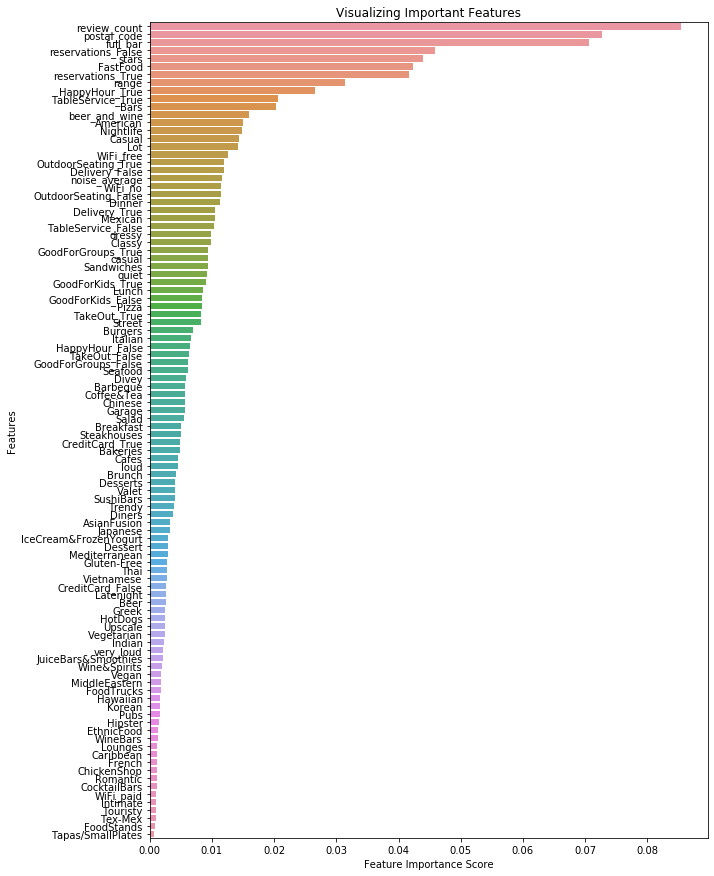

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.figure(figsize=(10,15))
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
#plt.legend()
plt.show()